In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import os
import numpy as np

from shapely import Point

import cartopy.crs as ccrs
crs_mercator = ccrs.GOOGLE_MERCATOR

import cartopy.io.img_tiles as cimgt
request = cimgt.OSM()


labelsize=20
pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    #"font.family": "sans-serif",
    #"font.sans-serif": ["Computer Modern"],
    "font.serif": [],                   # blank entries should cause plots 
    "font.sans-serif": [],              # to inherit fonts from the document
    "font.monospace": [],
    "axes.labelsize": labelsize,               # LaTeX default is 10pt font.
    "font.size": labelsize,
    "legend.fontsize": labelsize,               # Make the legend/label fonts 
    "xtick.labelsize": labelsize,               # a little smaller
    "ytick.labelsize": labelsize,
    "figure.figsize": (12,8),     # default fig size of 0.9 textwidth
    "pgf.preamble": "\n".join([ # plots will use this preamble
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        #r"\usepackage[detect-all,locale=DE]{siunitx}",
        ])
    }
mpl.rcParams.update(pgf_with_latex)

In [2]:
crs = 'epsg:4326'

In [3]:
#df = pd.read_csv('results/road-damages.csv', sep=';')

#geoms = [ Point(lat, lng) for lat,lng in zip(df['Latitude'], df['Longitude']) ]
#df['geometry'] = geoms
#hazard_gdf = gpd.GeoDataFrame(df, crs=crs)#.to_crs(crs_mercator.proj4_init)

hazard_gdf = gpd.read_file("results/hazard-list.geojson", driver='GeoJSON')
hazard_gdf

Name  Type     Tag      Key               Note  Longitude   Latitude   
0     Road  node  hazard  erosion            damaged  43.699184  12.201653  \
1   Bridge  node  hazard    flood          destroyed  43.455331  12.657820   
2     Road  node  hazard  erosion  driftwood on road  43.666883  12.222446   
3   Bridge  node  hazard    flood            damaged  43.465813  12.808727   
4     Road  node  hazard    flood       construction  43.496736  12.788935   
5     Road  node  hazard    flood            closure  43.453440  12.662307   
6     Road  node  hazard    flood            closure  43.453053  12.661826   
7   Bridge  node  hazard    flood          destroyed  43.468075  12.638110   
8     Road  node  hazard    flood     debris on road  43.542658  12.651024   
9     Road  node  hazard  erosion            damaged  43.481343  12.612608   
10    Road  node  hazard    flood          destroyed  43.513692  12.640397   
11    Road  node  hazard    flood            damaged  43.455260  12.657928   
12    Road  node  hazard    flood            closure  43.442634  12.632106   
13    Road  node  hazard  erosion     erosion damage  43.560800  12.459967   
14    Road  node  hazard  erosion            damaged  43.661854  12.226987   
15  Bridge  node  hazard    flood          destroyed  43.500943  12.633068   
16    Road  node  hazard  erosion            damaged  43.674101  12.219251   
17  Bridge  node  hazard    flood          destroyed  43.512058  12.819009   
18    Road  node  hazard    flood            damaged  43.465616  12.809726   
19    Road  node  hazard  erosion            damaged  43.650075  12.850731   
20    Road  node  hazard  erosion  landslide on road  43.659574  12.228142   
21  Bridge   way  hazard    flood          destroyed  43.562380  12.838280   
22  Bridge   way  hazard    flood  damaged/destroyed  43.521000  12.828470   
23  Bridge   way  hazard    flood  damaged/destroyed  43.423300  12.595350   
24  Bridge   way  hazard    flood  damaged/destroyed  43.500010  12.865250   
25  Bridge   way  hazard    flood  damaged/destroyed  43.589200  12.510040   
26    Road  node  hazard  erosion  driftwood on road  43.667277  12.221856   
27  Bridge  node  hazard    flood             closed  43.715193  13.213812   
28    Road  node  hazard  erosion            damaged  43.695501  12.211516   
29    Road  node  hazard    flood            damaged  43.476730  12.597445   

                     geometry  
0   POINT (12.20165 43.69918)  
1   POINT (12.65782 43.45533)  
2   POINT (12.22245 43.66688)  
3   POINT (12.80873 43.46581)  
4   POINT (12.78894 43.49674)  
5   POINT (12.66231 43.45344)  
6   POINT (12.66183 43.45305)  
7   POINT (12.63811 43.46807)  
8   POINT (12.65102 43.54266)  
9   POINT (12.61261 43.48134)  
10  POINT (12.64040 43.51369)  
11  POINT (12.65793 43.45526)  
12  POINT (12.63211 43.44263)  
13  POINT (12.45997 43.56080)  
14  POINT (12.22699 43.66185)  
15  POINT (12.63307 43.50094)  
16  POINT (12.21925 43.67410)  
17  POINT (12.81901 43.51206)  
18  POINT (12.80973 43.46562)  
19  POINT (12.85073 43.65007)  
20  POINT (12.22814 43.65957)  
21  POINT (12.83828 43.56238)  
22  POINT (12.82847 43.52100)  
23  POINT (12.59535 43.42330)  
24  POINT (12.86525 43.50001)  
25  POINT (12.51004 43.58920)  
26  POINT (12.22186 43.66728)  
27  POINT (13.21381 43.71519)  
28  POINT (12.21152 43.69550)  
29  POINT (12.59745 43.47673)

In [4]:
marche_gdf = gpd.read_file('shapes/catchments/auszug1_3035.shp')
marche_gdf = marche_gdf.to_crs(crs)#.to_crs(crs_mercator.proj4_init)

water_gdf = gpd.read_file('shapes/osm-infrastructure/water/waterways.gpkg')
water_gdf = water_gdf.to_crs(crs)#.to_crs(crs_mercator.proj4_init)

In [5]:
track = gpd.GeoDataFrame(columns=['name', 'geometry'], 
     geometry='geometry').set_crs(crs)

for file in os.listdir('shapes/route/driven-route/'):
    if file.endswith(('.gpx')):
        #try:
        gdf = gpd.read_file('shapes/route/driven-route/' + file, layer='tracks')
        gdf['name'] = file
        track = pd.concat([track, gdf[['name', 'geometry']]])
track = track.reset_index()
track = track.drop('index', axis=1)
#track = track.to_crs(crs_mercator.proj4_init)

/Users/jonas/miniconda3/envs/marche311/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


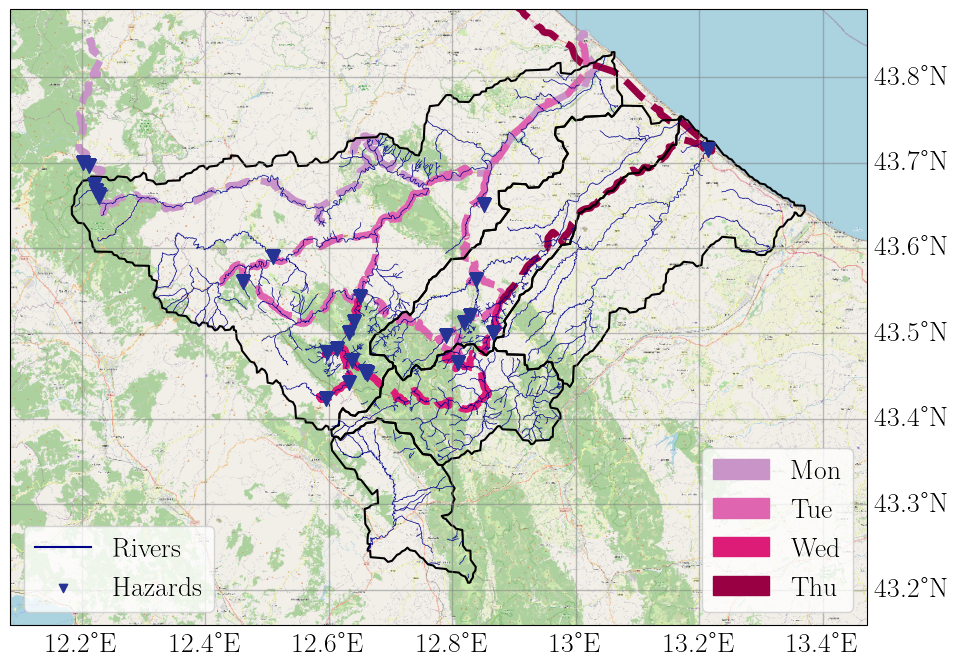

In [6]:
day_labels = dict(zip(['Mon', 'Tue', 'Wed', 'Thu'], ['#c994c7', '#df65b0', '#dd1c77', '#980043']))

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels={"bottom": "x", "right": "y"},
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')

west, south, east, north = marche_gdf.unary_union.bounds
eps=0.1
ax.set_extent([west-eps, east+eps, south-eps/2, north+eps/2], crs=ccrs.PlateCarree())
ax.add_image(request, 12)

marche_gdf.boundary.plot(ax=ax, color='black', transform=ccrs.PlateCarree())
hazard_gdf.plot(ax=ax, color='#253494', marker='v', zorder=3, markersize=100, transform=ccrs.PlateCarree())
water_gdf.plot(ax=ax, color='darkblue', linewidth=0.5, transform=ccrs.PlateCarree())

handles = []
for day,color in day_labels.items():
    daytrack = track[track['name'].str.contains(day)]
    daytrack.plot(ax=ax, color=color, linestyle='--', legend=True, linewidth=5, zorder=0, transform=ccrs.PlateCarree())
    patch = mpatches.Patch(color=color, label=day)
    handles.append(patch)
legend1 = ax.legend(handles=handles, loc='lower right')

ax.plot([], [], color='darkblue', label='Rivers')
ax.scatter([], [], marker='v', color='#253494', label='Hazards')

ax.legend(loc='lower left')
ax.add_artist(legend1)

In [7]:
fig.savefig('results/figs/hazardmap.png', bbox_inches="tight")